In [1]:
import tensorflow as tf
from tensorflow.keras import backend as K

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11501568/11490434 [==============================] - 0s 0us/step


In [7]:
model=tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                  tf.keras.layers.Dense(128),
                                  tf.keras.layers.Lambda(lambda x: tf.abs(x)),
                                  tf.keras.layers.Dense(10,activation='softmax')
                                 ])

In [11]:
model.compile(optimizer='adam',
             loss="sparse_categorical_crossentropy",
             metrics=['accuracy'])

model.fit(x_train,y_train, epochs=5)
model.evaluate(x_test,y_test)

Epoch 1/5
1875/1875 [==============================] - 3s 935us/step - loss: 0.2202 - accuracy: 0.9379
Epoch 2/5
1875/1875 [==============================] - 2s 841us/step - loss: 0.0928 - accuracy: 0.9723
Epoch 3/5
1875/1875 [==============================] - 2s 821us/step - loss: 0.0640 - accuracy: 0.9801
Epoch 4/5
1875/1875 [==============================] - 2s 810us/step - loss: 0.0495 - accuracy: 0.9845
Epoch 5/5
313/313 [==============================] - 0s 520us/step - loss: 0.0901 - accuracy: 0.9747


[0.0900508314371109, 0.9746999740600586]

In [17]:
from keras import backend as k
def custom_activation(x):
    return k.maximum(0.1, x)
    

In [18]:
model=tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                  tf.keras.layers.Dense(128),
                                  tf.keras.layers.Lambda(custom_activation),
                                  tf.keras.layers.Dense(10,activation='softmax')
                                 ])

In [19]:
model.compile(optimizer='adam',
             loss="sparse_categorical_crossentropy",
             metrics=['accuracy'])

model.fit(x_train,y_train, epochs=5)
model.evaluate(x_test,y_test)

Epoch 1/5
1875/1875 [==============================] - 2s 695us/step - loss: 0.2645 - accuracy: 0.9242
Epoch 2/5
1875/1875 [==============================] - 1s 690us/step - loss: 0.1146 - accuracy: 0.9666
Epoch 3/5
1875/1875 [==============================] - 1s 680us/step - loss: 0.0792 - accuracy: 0.9764
Epoch 4/5
1875/1875 [==============================] - 1s 684us/step - loss: 0.0599 - accuracy: 0.9816
Epoch 5/5
313/313 [==============================] - 0s 534us/step - loss: 0.0739 - accuracy: 0.9775


[0.0739113911986351, 0.9775000214576721]

In [34]:
# inherit from this base class
from tensorflow.keras.layers import Layer

class SimpleDense(Layer):

    def __init__(self, units=32):
        '''Initializes the instance attributes'''
        super(SimpleDense, self).__init__()
        self.units = units

    def build(self, input_shape):
        '''Create the state of the layer (weights)'''
        # initialize the weights
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(name="kernel",
            initial_value=w_init(shape=(input_shape[-1], self.units),
                                 dtype='float32'),
            trainable=True)

        # initialize the biases
        b_init = tf.zeros_initializer()
        self.b = tf.Variable(name="bias",
            initial_value=b_init(shape=(self.units,), dtype='float32'),
            trainable=True)

    def call(self, inputs):
        '''Defines the computation from inputs to outputs'''
        return tf.matmul(inputs, self.w) + self.b

In [35]:
# declare an instance of the class
my_dense = SimpleDense(units=1)

# define an input and feed into the layer
x = tf.ones((1, 1))
y = my_dense(x)

print(my_dense.variables)

[<tf.Variable 'simple_dense_8/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[-0.05786064]], dtype=float32)>, <tf.Variable 'simple_dense_8/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


In [36]:
# define the dataset
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)


# use the Sequential API to build a model with our custom layer
my_layer = SimpleDense(units=1)
model = tf.keras.Sequential([my_layer])

# configure and train the model
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(xs, ys, epochs=500,verbose=0)

# perform inference
print(model.predict([10.0]))

# see the updated state of the variables
print(my_layer.variables)

[[18.981445]]
[<tf.Variable 'simple_dense_9/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.9973109]], dtype=float32)>, <tf.Variable 'simple_dense_9/bias:0' shape=(1,) dtype=float32, numpy=array([-0.991663], dtype=float32)>]


In [37]:
# inherit from this base class
from tensorflow.keras.layers import Layer

class SimpleDense(Layer):

    def __init__(self, units=32, activation=None):
        '''Initializes the instance attributes'''
        super(SimpleDense, self).__init__()
        self.units = units
        self.activation=tf.keras.activations.get(activation)

    def build(self, input_shape):
        '''Create the state of the layer (weights)'''
        # initialize the weights
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(name="kernel",
            initial_value=w_init(shape=(input_shape[-1], self.units),
                                 dtype='float32'),
            trainable=True)

        # initialize the biases
        b_init = tf.zeros_initializer()
        self.b = tf.Variable(name="bias",
            initial_value=b_init(shape=(self.units,), dtype='float32'),
            trainable=True)

    def call(self, inputs):
        '''Defines the computation from inputs to outputs'''
        return self.activation(tf.matmul(inputs, self.w) + self.b)

In [38]:
model=tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                  SimpleDense(128, activation='relu'),
                                  tf.keras.layers.Lambda(custom_activation),
                                  tf.keras.layers.Dense(10,activation='softmax')
                                 ])

In [39]:
model.compile(optimizer='adam',
             loss="sparse_categorical_crossentropy",
             metrics=['accuracy'])

model.fit(x_train,y_train, epochs=5)
model.evaluate(x_test,y_test)

Epoch 1/5
1875/1875 [==============================] - 2s 727us/step - loss: 0.2685 - accuracy: 0.9249
Epoch 2/5
1875/1875 [==============================] - 1s 720us/step - loss: 0.1167 - accuracy: 0.9652
Epoch 3/5
1875/1875 [==============================] - 1s 720us/step - loss: 0.0792 - accuracy: 0.9757
Epoch 4/5
1875/1875 [==============================] - 1s 749us/step - loss: 0.0584 - accuracy: 0.9816
Epoch 5/5
313/313 [==============================] - 0s 550us/step - loss: 0.0793 - accuracy: 0.9748


[0.07934995740652084, 0.9747999906539917]

In [40]:
### understanding Residual Network

class CNNResidual(Layer):
    
    def __init__(self, layers,filters, **kwargs):
        super.__init__(**kwargs)
        self.hidden=[Conv2D(filters,(3,3), activation="relu") for _ in range(layers)]
        
        
    def call(self, inputs):
        x=inputs
        
        for layers in self.hidden:
            x=layer(x)
            
        return inputs+x
    
class DNNResidual(Layer):
    
    def __init__(self, neurons, **kwargs):
        super.__init__(**kwargs)
        self.hidden=[Dense(neurons, activation="relu") for _ in range(layers)]
        
        
    def call(self, inputs):
        x=inputs
        
        for layers in self.hidden:
            x=layer(x)
            
        return inputs+x
    
    
    

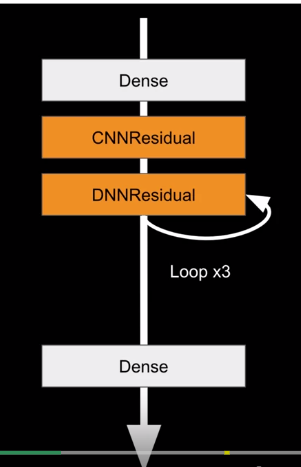

In [42]:
### Dense Neuron 30, activation relu
## cnn residual 2,32
## dnn residual 2,64
## Dense neuron 1
class MyResidual(tf.keras.Model):
    
    def __init__(self, **kwargs):
        self.hidden1=Dense(30, activation="relu")
        
        self.block1=self.CNNResidual(2,32)
        self.block2=self.DNNResidual(2,64)
        self.hidden2=Dense(1)
        
    def call(self, inputs):
        x=self.hidden1()
        
        x=self.CNNResidual(x)
        
        for _ in range(1,4):
            x=self.DNNResidual(x)
        
        x= self.hidden2(x)
        
        return x
           
        

In [43]:
class IdentityBock(tf.keras.Model):
    
    def __int__(self, filters, kernal_size):
        self.super(IdentityBock, self).__init__(name="")
        
        self.conv=tf.keras.layers.Conv2D(filters, kernal_size, padding="same")
        self.bn=tf.keras.layers.BatchNormalization()
        
        self.act=tf.keras.layers.Activation('relu')
        self.add=tf.keras.Add()
        
    def call(self, input_tensors):
        
        x=self.conv(x)
        x=self.bn(x)
        x=self.act(x)

        x=self.conv(x)
        x=self.bn(x)
        x=self.act(x)

        x=self.add([x, input_tensor])
        
        return x
    
    
    
    
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        

In [ ]:
class ResNet(tf.keras.Model):
    def __init__(self, number_of_classes):
        
        super( ResNet,self).__init__(name='')
        
        self.conv=tf.keras.layers.conv(64,7,paddings='same')
        self.bn=tf.keras.layers.BatchNormalization()
        self.act=tf.keras.layers.Activation('relu')
        self.max_pool=tf.keras.layers.MaxPooling2D((3,3))
        
        self.idla=IdentityBock(64,3)
        self.idlb=IdentityBock(64,3)
        
        
        self.global_pool=tf.keras.layers.GlobalAveragePooling2D()
        
        self.classifier=Dense(number_of_classes,activations="relu")
        
    def call(self, inputs):
        
        x=self.conv(inputs)
        x=self.bn(x)
        x=self.act(x)
        
        x=self.max_pool(x)
        
        x=self.idla(x)
        x=self.idlb(x)
        
        
        x=self.global_pool(x)
        
        return self.classifier(x)
        
        
        
        
        
        
             